In [1]:
#import statements

#standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#standard sklearn imports
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#sklearn algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',50)
pd.set_option('display.max_colwidth', -1)

In [3]:
trainTest = pd.read_csv('trainTest.csv',low_memory = False)

In [4]:
train = trainTest[trainTest['dataType'] == 'train'].copy()
test = trainTest[trainTest['dataType'] == 'test'].copy()

In [5]:
#load label encoder
le = preprocessing.LabelEncoder()

In [6]:
#apply label encoder to train data
train = train.apply(le.fit_transform)

#apply label encoder to test data
#test = test.apply(le.fit_transform)

In [7]:
train.head()

,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity,quantity_group,region,region_code,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
0,1,40,0,47,5,3,0,1,5513,28152,7,4,0,0,109,2,1,1,3,10,8,0,6,0,6,1,1,2,2,13,0,2,0,0,0,0,0,0
1,4,51,0,309,2,3,0,1,53253,25573,11,4,0,2,276,2,2,2,9,19,5,1,3,0,6,1,1,4,2,5,0,2,0,0,1,0,0,0
2,5,50,0,300,4,3,0,1,38862,44704,7,4,0,5,247,2,1,1,8,20,0,1,1,0,6,2,1,4,1,24,0,1,0,0,0,0,0,0
3,7,27,0,272,17,14,5,10,474,50370,7,4,0,2,58,2,0,0,12,25,3,0,0,2,6,2,1,4,0,27,0,0,0,0,1,1,0,0
4,4,0,0,104,1,3,0,1,54521,4772,1,1,0,2,0,2,3,3,4,17,5,1,3,0,6,1,1,2,6,12,0,0,0,0,1,0,0,0


In [8]:
#create target variable for validation
target = train.status_group

#remove target variable from train
train = train.drop(['status_group','dataType'],axis =1)

In [10]:
#create training & test data for validation
xTrain, xTest, yTrain, yTest = train_test_split(train,target, test_size = .3)

#splits data set into 2 groups of 2 groups

#Group 1: train & test
#Group 2: x & y

#Group 1:
#train has 70% of the data according to test_size and test has the remaining 30%
#train is what you use to fit the model
#test is what you validate it on

#Group 2:
#x entire data frame to train the model 
#y the target variables for the model 

# xTrain inputs for determining yTrain to fit the model
# yTest inputs for trying to predict yTest to validate the model

In [11]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(41580, 36) (41580,)
(17820, 36) (17820,)


In [13]:
#import tree
clf_tree = tree.DecisionTreeClassifier()
clf_rnf = RandomForestClassifier()

In [15]:
#fit model
model_tree = clf_tree.fit(xTrain,yTrain)
model_rnf = clf_rnf.fit(xTrain,yTrain)

In [16]:
#make predictions
predictions_tree = model_tree.predict(xTest)
predictions_rnf = model_rnf.predict(xTest)

In [19]:
#contains a list of predictions for the model
print(predictions_tree[0:30])
print(predictions_rnf[0:30])

[0 2 0 0 1 0 2 0 1 2 0 0 2 1 0 0 0 0 0 0 2 2 2 2 2 0 2 0 0 0]
[2 2 0 0 1 0 2 0 2 2 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 0]


In [48]:
model_dif = (predictions_tree == predictions_rnf)

In [59]:
model_dif.tolist().count(False)
#number of instances where rnf disagrees with decision tree

2608

In [60]:
model_dif.tolist().count(False)/len(model_dif)
#a little more than 14% of the data

0.1463524130190797

In [61]:
#accuracy score import
from sklearn.metrics import accuracy_score

#print(tree_model.score(xTest,yTest))
#for the tree model, here is how well you predict yTest, given inputs of xTest

#print(accuracy_score(yTest,predictions))
#here is how the actual values of yTest compare with your predictions

In [62]:
print(accuracy_score(yTest,predictions_tree))
print(accuracy_score(yTest,predictions_rnf))
#find that Random Forest is more accurate

0.758417508418
0.795061728395


Text(0,0.5,'Predictions')

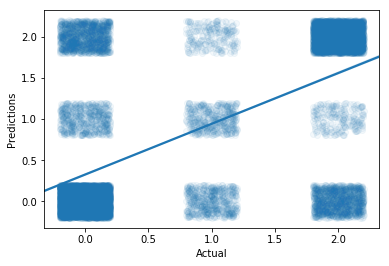

In [63]:
sns.regplot(x=yTest, 
            y=predictions_tree, 
            x_jitter=.2, 
            y_jitter=.2, 
            scatter_kws={'alpha': .05})
plt.xlabel("Actual")
plt.ylabel("Predictions")

#not 100% sure what this means.  Hard to interpret

Text(0,0.5,'Predictions')

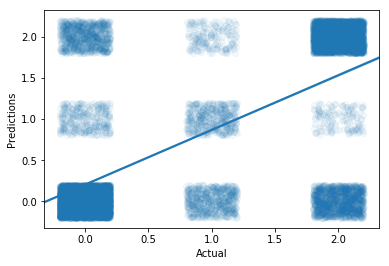

In [64]:
sns.regplot(x=yTest, 
            y=predictions_rnf, 
            x_jitter=.2, 
            y_jitter=.2, 
            scatter_kws={'alpha': .05})
plt.xlabel("Actual")
plt.ylabel("Predictions")

In [ ]:
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
#https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-4